In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('ggplot')

from src.data.read_dataset import get_processed_dataset

In [7]:
df = get_processed_dataset('CSSE')

In [8]:
country = "Italy"
start_date = "2020-02-24"
country_progression = df[(df.Country == country) & (df.Date > start_date)]

## Fitting with exponential function

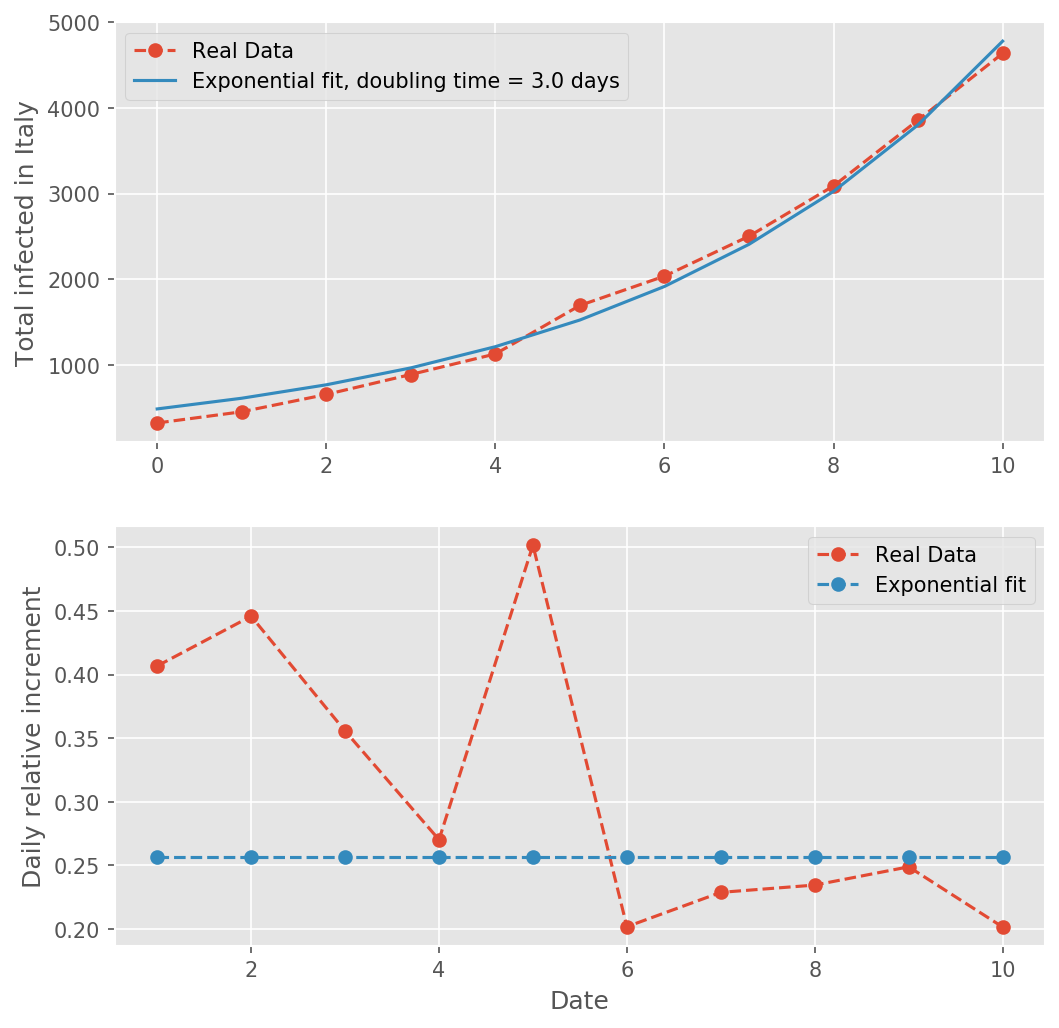

In [9]:
ydata = country_progression.Confirmed.tolist()
xdata = np.arange(len(ydata))
popt, pcov = curve_fit(f=lambda t,a,b: a*2**(t/b),xdata=xdata,ydata=ydata)
perr = np.sqrt(np.diag(pcov))
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(8,8))
perc = np.diff(ydata) / ydata[:-1]
yfit = popt[0]*2**(xdata/popt[1])
perc_fit = np.diff(yfit) / yfit[:-1]
ax1.set_ylabel('Total infected in Italy')
ax1.plot(ydata,'--o',label='Real Data')
ax1.plot(xdata,yfit,'-',label=f'Exponential fit, doubling time = {round(popt[1],1)} days')
ax2.plot(xdata[1:],perc,'--o',label='Real Data')
ax2.plot(xdata[1:],perc_fit,'--o',label='Exponential fit')
ax2.set_ylabel('Daily relative increment')
ax2.set_xlabel('Date')
ax1.legend()
ax2.legend()
plt.show()

## Fitting with quadratic function

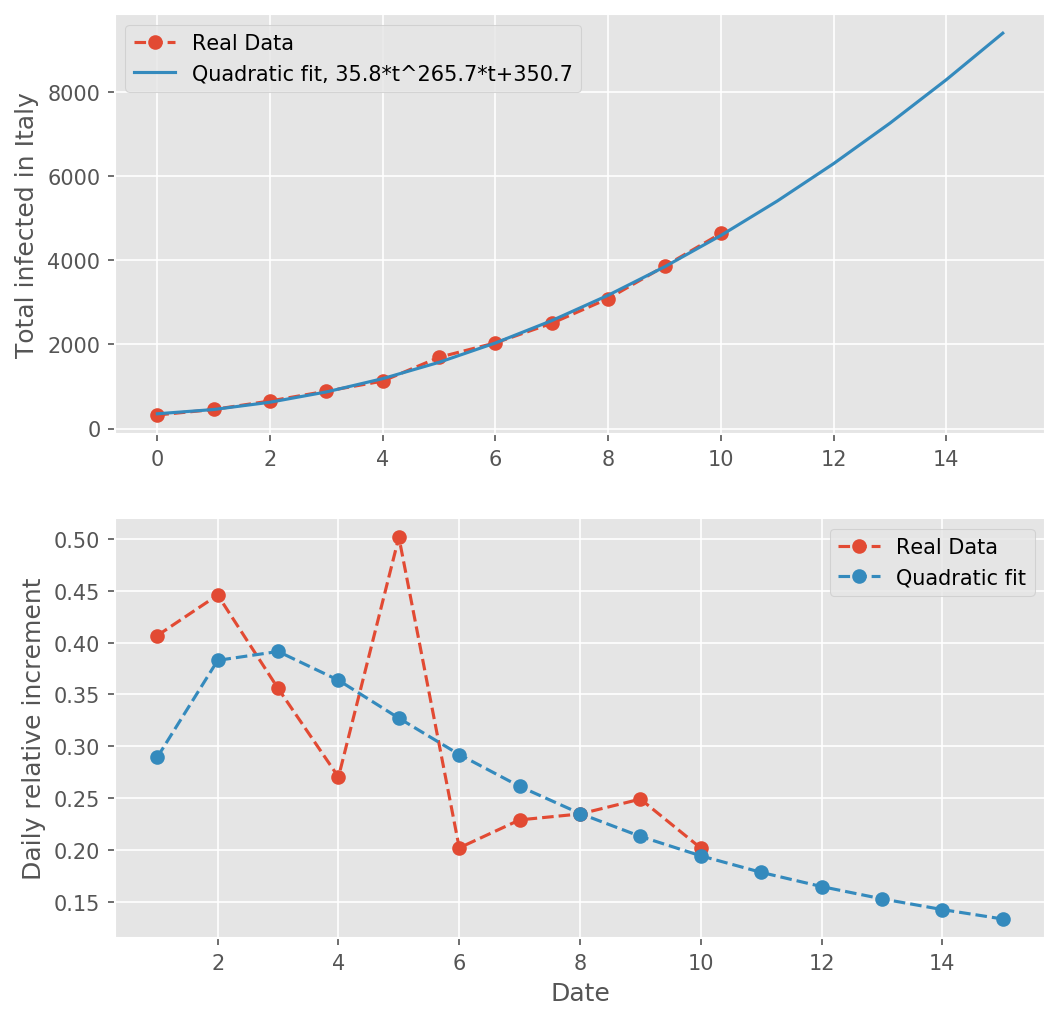

In [10]:
popt, pcov = curve_fit(f=lambda t,a,b,c: a*t**2+b*t+c,xdata=xdata,ydata=ydata)
perr = np.sqrt(np.diag(pcov))
xpred = np.arange(len(ydata) + 5)
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(8,8))
perc = np.diff(ydata) / ydata[:-1]
yfit = popt[0]*np.power(xpred,2)+popt[1]*xpred+popt[2]
perc_fit = np.diff(yfit) / yfit[:-1]
ax1.set_ylabel('Total infected in Italy')
ax1.plot(ydata,'--o',label='Real Data')
ax1.plot(xpred,yfit,'-',label=f'Quadratic fit, {round(popt[0], 1)}*t^2{round(popt[1],1)}*t+{round(popt[2],1)}')
ax2.plot(xdata[1:],perc,'--o',label='Real Data')
ax2.plot(xpred[1:],perc_fit,'--o',label='Quadratic fit')
ax2.set_ylabel('Daily relative increment')
ax2.set_xlabel('Date')
ax1.legend()
ax2.legend()
plt.show()